# PyTorch  Framework for Multi-class Text Classification

## BBC Sports Classification - 5 Class Problem

* Consists of 737 documents from the BBC Sport website corresponding to sports news articles in five topical areas from 2004-2005.
* Class Labels: 5 <br/>

    0 - Rugby <br/>
    1 - Tennis <br/>
    2 - Football <br/>
    3 - Cricket <br/>
    4 - Atheletics <br/>


## Reading Data

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append("..")
pd.set_option('display.max_colwidth', -1)

In [2]:
df_train = pd.read_csv('../datasets/bbcsports/train.csv')
df_test = pd.read_csv('../datasets/bbcsports/test.csv')
df_score = pd.read_csv('../datasets/bbcsports/test_with_label.csv')
df_val = pd.read_csv('../datasets/bbcsports/dev.csv')

In [3]:
df_train.shape, df_test.shape, df_val.shape

((471, 3), (148, 2), (118, 3))

In [4]:
df_train.label.value_counts()

2    169
0    94 
3    79 
4    65 
1    64 
Name: label, dtype: int64

In [5]:
df_val.label.value_counts()

2    43
0    23
3    20
4    16
1    16
Name: label, dtype: int64

## Training Transformers (Albert | Roberta | DistilBert) classifier with FrameWork

In [6]:
from classitransformers.report import metrics
from classitransformers.configs import Configs
from classitransformers.pytransformers import TransformersClassification

## Set Configurations

* Pre-trained config filepath, vocab filepath and model checkpoint filepath
* labels list
* train, test and eval batch size
* max_seq_len - how long is the each text input sentence !!
* data_dir - data path folder (optional)
* output_dir - output path folder (optional)

In [7]:
config = Configs(
                pretrained_model_dir = '../models/Albert',
                model_name = 'albert',
                num_train_epochs=3,
                train_batch_size = 16,
                eval_batch_size = 8, 
                do_train = True, 
                do_eval = True, 
                max_seq_length = 256,
                label_list = ["0", "1", "2", "3", "4"],
                data_dir = '../datasets/bbcsports',
                output_dir = '../transformers_output_bbcsports/')

In [8]:
model = TransformersClassification(config)

## Train Method

In [9]:
model.train()


======== Epoch 1 / 3 ========
Training...

  Average training loss: 1.39
  Training epcoh took: 0:00:39

Running Validation...
  Accuracy: 0.92
  Validation Loss: 0.00
  Validation took: 0:00:04

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.30
  Training epcoh took: 0:00:40

Running Validation...
  Accuracy: 0.98
  Validation Loss: 0.00
  Validation took: 0:00:04

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.04
  Training epcoh took: 0:00:40

Running Validation...
  Accuracy: 0.98
  Validation Loss: 0.00
  Validation took: 0:00:04
Saving model to ../transformers_output_bbcsports/

Training complete!
Total training took 0:02:12 (h:mm:ss)


## Test Method

In [10]:
prediction = model.test()

**Testing a sentence, takes a list of sentences.**

In [11]:
model.text_inference(['Rodger Fedrer is one of the great tennis player. Rafael Nadal is very good player at clay court. They have combined won more than 30 grand slams till now.'])

[array([0.25924018, 0.98505855, 0.27304068, 0.23541152, 0.383295  ],
       dtype=float32)]

In [12]:
y_pred = [np.argmax(tup) for tup in prediction]
y = df_score.label

## Accuracy and Report



Accuracy: 0.980
Precision: 0.983
Recall: 0.982
F1-Score: 0.982


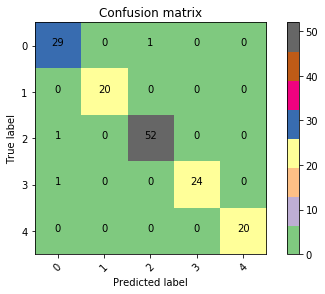

In [13]:
metrics(y,y_pred)